In [2]:
import json
import requests
import pandas as pd
from config import api_key
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


In [2]:
# Zillow Data URL
URL_Data_Csv = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA.json?qopts.export=true&api_key={api_key}")

# API Call
data_csv = requests.get(URL_Data_Csv).json()

In [3]:
# Retrieve csv download link
data_link = data_csv['datatable_bulk_download']['file']['link']
data_link

'https://quandl-production-datahub.s3.amazonaws.com/export/ZILLOW/DATA/ZILLOW_DATA_962c837a6ccefddddf190101e0bafdaf.zip?X-Amz-Expires=1800&X-Amz-Date=20231009T222013Z&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEL7//////////wEaCXVzLWVhc3QtMSJHMEUCIQCIyTIzDnxUFAtVUDmY14VkxFl1rfo4JAnLyklMcbEiiAIgNL62KBITkaNzO6ebf5ViIqxOIzpb9XAUFcubZ58SYGcqvAUIx///////////ARACGgwzMDYzMjA1MDAyMDQiDFX1rWkd10EtJERMGCqQBcJEne4eRbUtze8w3HfFXhxjXi4BlV044R6GXfkhO2uFuaiJVwUGh/PvaNgVe8SDLizQo0CiI1NCafJWsYA6TUMH/k%2BQy8uZxMoCBglwMgr8x3L34FnnMn6JOMa8F6GQYk7R8Av%2BPbsRVdZBnEecCbYz/IOu69HwFSmckoC1HOZIvq8kxDO5f5%2BJ0ZWUxkIBiGYIWbP7Drm2On/NbR4eBhbvRUdfOf0h5D5/e9bHcdugRmOSVx%2B2%2BvmlEIFtII5CfNpU706BeRvW7f9dYGPE0WT63Om4ojarnjkjM9H0JH2nBtMCHaGzgbpQ6ENXDjqoeuxkfJxx7ux9bWDWrwfjMnCPS7CAsJPTsucpyGHQAGyq2aSA3T6AoSxZTYvWdb0s9xP1a9I6niZUFdAAkB5RbVu3vW0va%2Be1NyXpTfPYBzlTc/3plvzH9GPUDpKbUuNutceF7dIiXCxO9p5IfHcnH0DMZICaieTlor5VcIUFmgUeyLHeezlWQtZhcoiIQdoBPHWCxMW3gjcKfgcwsiYCJp1k7iS6sp5JWkHO2aKatPXmL05twC/jvqEdP3J9Vbqj8HcMFi3jWlsJc6t1yZNx

In [4]:
# CSV File Paths
path_data = Path("Resources", "Zillow_Data.csv")

# Create DataFrames for the CSV Files
data_df = pd.read_csv(path_data)
data_df

,indicator_id,region_id,date,value
0,ZATT,3101,1998-01-31,338849.000000
1,ZATT,3101,1998-02-28,342993.000000
2,ZATT,3101,1998-03-31,346763.000000
3,ZATT,3101,1998-04-30,349356.000000
4,ZATT,3101,1998-05-31,351981.000000
...,...,...,...,...
150217956,Z4BR,27874,2023-08-31,163372.164088
150217957,Z4BR,51236,2023-08-31,197282.405592
150217958,Z4BR,22166,2023-08-31,321075.347722
150217959,Z4BR,54589,2023-08-31,144402.793079


In [5]:
# Zillow Indicators URL
URL_Indicators = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/INDICATORS.json?&api_key={api_key}")

# API Call
response_ind = requests.get(URL_Indicators).json()

# Create Indicators DataFrame
indicators_df = pd.DataFrame(response_ind['datatable']['data'])

# Rename columns
indicators_df = indicators_df.rename(columns = {0: 'indicator_id', 
                          1: 'indicator', 
                          2: 'category',
                                               })

indicators_df.head()

,indicator_id,indicator,category
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values


In [6]:
# Zillow Regions URL
URL_Regions = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/REGIONS.json?qopts.export=true&api_key={api_key}")

# API Call
regions_csv = requests.get(URL_Regions).json()

In [7]:
# Retrieve csv download link
regions_link = regions_csv['datatable_bulk_download']['file']['link']
regions_link

'https://quandl-production-datahub.s3.amazonaws.com/export/ZILLOW/REGIONS/ZILLOW_REGIONS_1a51d107db038a83ac171d604cb48d5b.zip?X-Amz-Expires=1800&X-Amz-Date=20231009T222108Z&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEL7//////////wEaCXVzLWVhc3QtMSJGMEQCIC2MmGf5goBxFzytZNOvBf22dOCaYxlinA9JSdqGSI3fAiBSip8j6MZFJ1W5tD8UO/hDMxnA0XLeAaIK5UlfYjNIrSq8BQjH//////////8BEAIaDDMwNjMyMDUwMDIwNCIMo8LywcshYjWbKyhSKpAFFvxXrEcJkTlhWa3gbNCGvnm1szuG4fABSwgvvcSIFJHEH1l1%2BNCTaFT0CHYj33gwik8iATY8ubzKtHebctImU2lgSOPhgwGIylyDULje9zHrG%2BJJF27Qap76oCcaSctOBe8obPFHMpkrwznkHLN7wnqNN4%2B7stEdqe3G144dHzNKsJK9w3xwqxGK5a6ou8%2BeM28/Gm9fdNLMguf2YDk9qfvoU%2BtvCxAtEp%2BMs1iPLkk1Q2WCJCgyUlitDcDtku4tdoXamRxUN762T7XquNfz51TnMwLAFwMG1X5eBHRJwNSBGZekm3a337lbPpVPMOgq60/AC3ja1BHt549NuhneJCHvN9WizSFOUtZnmlyKJ89pwvDfEfw2sLXv3emsZRJZKTkH7RzCfLxlPPqvufJwH8UvZNeOgKI/bVlcyFjgjKDTWt/Z7VHzZTaEjQg/bAONjKvNeGWVuAnDBOwTn00B%2B1rt%2BCUi80F9CKisbxt315nU8fGM3itci1rhg6FQ6SHk%2BH7TryuFmPQIs%2B1zPTV03AXBQroco7ma1n1m9ldSWguoUDPW%2BkjWEoGrS2N3vTr%2Bbp

In [8]:
# CSV File Paths
path_regions = Path("Resources", "Zillow_Regions.csv")

# Create DataFrames for the CSV Files
regions_df = pd.read_csv(path_regions)
regions_df

,region_id,region_type,region
0,394401,metro,"Boone, IA; IA"
1,274772,neigh,Northeast Dallas; TX; Dallas-Fort Worth-Arling...
2,273698,neigh,"Far North; TX; Dallas-Fort Worth-Arlington, TX..."
3,275473,neigh,Southeast Dallas; TX; Dallas-Fort Worth-Arling...
4,196538,neigh,Murray Hill; NY; New York-Newark-Jersey City; ...
...,...,...,...
89300,87837,zip,"68058;NE;Omaha-Council Bluffs, NE-IA;South Ben..."
89301,61652,zip,"10038;NY;New York-Newark-Jersey City, NY-NJ-PA..."
89302,79935,zip,49777;MI;nan;Presque Isle;Presque Isle County
89303,62010,zip,"11109;NY;New York-Newark-Jersey City, NY-NJ-PA..."


In [9]:
# Merge the Data and Indicator DataFrames
df_12 = pd.merge(data_df, indicators_df, on = 'indicator_id', how = 'left')
df_12

,indicator_id,region_id,date,value,indicator,category
0,ZATT,3101,1998-01-31,338849.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
1,ZATT,3101,1998-02-28,342993.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
2,ZATT,3101,1998-03-31,346763.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZATT,3101,1998-04-30,349356.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
4,ZATT,3101,1998-05-31,351981.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
...,...,...,...,...,...,...
150217956,Z4BR,27874,2023-08-31,163372.164088,ZHVI 4-Bedroom Time Series ($),Home values
150217957,Z4BR,51236,2023-08-31,197282.405592,ZHVI 4-Bedroom Time Series ($),Home values
150217958,Z4BR,22166,2023-08-31,321075.347722,ZHVI 4-Bedroom Time Series ($),Home values
150217959,Z4BR,54589,2023-08-31,144402.793079,ZHVI 4-Bedroom Time Series ($),Home values


In [10]:
# Merge all DataFrames
merged_df = pd.merge(df_12, regions_df, on = 'region_id') 
merged_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
0,ZATT,3101,1998-01-31,338849.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
1,ZATT,3101,1998-02-28,342993.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
2,ZATT,3101,1998-03-31,346763.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
3,ZATT,3101,1998-04-30,349356.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
4,ZATT,3101,1998-05-31,351981.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
...,...,...,...,...,...,...,...,...
150217956,Z3BR,65461,2020-02-29,129328.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217957,Z3BR,65461,2020-03-31,128308.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217958,Z3BR,65461,2020-04-30,126284.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217959,Z3BR,65461,2020-05-31,124288.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...


In [11]:
# Isolating for State rows only
bystate_df = merged_df[merged_df['region_type'] == 'state']
bystate_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
2706868,Z5BR,11,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut
2706869,Z4BR,11,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut
2706870,ZATT,11,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
2706871,ZATT,11,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
2706872,ZATT,11,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
...,...,...,...,...,...,...,...,...
73310371,ZALL,35,2023-03-31,438471.171251,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,state,Montana
73310372,ZCON,35,2023-03-31,428889.929517,ZHVI Condo/Co-op Time Series ($),Home values,state,Montana
73310373,ZABT,35,2023-03-31,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Home values,state,Montana
73310374,Z5BR,35,2023-03-31,606670.946721,ZHVI 5+ Bedroom Time Series ($),Home values,state,Montana


In [12]:
# Save DF to CSV
bystate_df.to_csv('Resources/bystate.csv', index=False)

In [4]:
# Call in csv
path_cleaning = Path("Resources", "bystate.csv")

cleaning_df = pd.read_csv(path_cleaning)
cleaning_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
0,Z5BR,11,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut
1,Z4BR,11,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut
2,ZATT,11,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
3,ZATT,11,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
4,ZATT,11,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
...,...,...,...,...,...,...,...,...
166796,ZALL,35,2023-03-31,438471.171251,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,state,Montana
166797,ZCON,35,2023-03-31,428889.929517,ZHVI Condo/Co-op Time Series ($),Home values,state,Montana
166798,ZABT,35,2023-03-31,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Home values,state,Montana
166799,Z5BR,35,2023-03-31,606670.946721,ZHVI 5+ Bedroom Time Series ($),Home values,state,Montana


In [5]:
# Remove these columns
cleaning_df = cleaning_df.drop(['region_id', 'category', 'region_type'], axis=1)

# Remove these rows
cleaning_df = cleaning_df[cleaning_df['indicator'] != 'ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)']
cleaning_df

,indicator_id,date,value,indicator,region
0,Z5BR,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut
1,Z4BR,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut
2,ZATT,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut
3,ZATT,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut
4,ZATT,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut
...,...,...,...,...,...
166795,Z4BR,2005-01-31,198881.000000,ZHVI 4-Bedroom Time Series ($),Montana
166797,ZCON,2023-03-31,428889.929517,ZHVI Condo/Co-op Time Series ($),Montana
166798,ZABT,2023-03-31,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Montana
166799,Z5BR,2023-03-31,606670.946721,ZHVI 5+ Bedroom Time Series ($),Montana


In [6]:
#show unique indicators
cleaning_df['indicator'].unique()

array(['ZHVI 5+ Bedroom Time Series ($)',
       'ZHVI 4-Bedroom Time Series ($)',
       'ZHVI All Homes- Top Tier Time Series ($)',
       'ZHVI 1-Bedroom Time Series ($)',
       'ZHVI Condo/Co-op Time Series ($)',
       'ZHVI 2-Bedroom Time Series ($)',
       'ZHVI Single-Family Homes Time Series ($)',
       'ZHVI All Homes- Bottom Tier Time Series ($)',
       'ZHVI 3-Bedroom Time Series ($)'], dtype=object)

In [7]:
# switch date column to date time type
cleaning_df['date'] = pd.to_datetime(cleaning_df['date'])

# add year column
cleaning_df['year'] = cleaning_df['date'].dt.year

# drop original date column
cleaning_df = cleaning_df.drop(['date'], axis = 1)
cleaning_df

,indicator_id,value,indicator,region,year
0,Z5BR,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166795,Z4BR,198881.000000,ZHVI 4-Bedroom Time Series ($),Montana,2005
166797,ZCON,428889.929517,ZHVI Condo/Co-op Time Series ($),Montana,2023
166798,ZABT,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Montana,2023
166799,Z5BR,606670.946721,ZHVI 5+ Bedroom Time Series ($),Montana,2023


In [8]:
# rename columns to more easily understood names
cleaning_df = cleaning_df.rename(columns = {'value': 'price', 'region': 'state', 'indicator': 'property type'})
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166795,Z4BR,198881.000000,ZHVI 4-Bedroom Time Series ($),Montana,2005
166797,ZCON,428889.929517,ZHVI Condo/Co-op Time Series ($),Montana,2023
166798,ZABT,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Montana,2023
166799,Z5BR,606670.946721,ZHVI 5+ Bedroom Time Series ($),Montana,2023


In [9]:
# switch price column to integer
cleaning_df['price'] = cleaning_df['price'].astype('int64')
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166795,Z4BR,198881,ZHVI 4-Bedroom Time Series ($),Montana,2005
166797,ZCON,428889,ZHVI Condo/Co-op Time Series ($),Montana,2023
166798,ZABT,262530,ZHVI All Homes- Bottom Tier Time Series ($),Montana,2023
166799,Z5BR,606670,ZHVI 5+ Bedroom Time Series ($),Montana,2023


In [10]:
# rename property type values to more easily understood names
cleaning_df['property type'] = cleaning_df['property type'].replace({'ZHVI 5+ Bedroom Time Series ($)': '5+ bedroom homes',
                                                            'ZHVI 4-Bedroom Time Series ($)': '4 bedroom homes',
                                                            'ZHVI Single-Family Homes Time Series ($)': 'single-family homes',
                                                            'ZHVI All Homes- Bottom Tier Time Series ($)': 'All home type - bottom tier',
                                                            'ZHVI 3-Bedroom Time Series ($)': '3 bedroom homes',
                                                            'ZHVI 2-Bedroom Time Series ($)': '2 bedroom homes',
                                                            'ZHVI All Homes- Top Tier Time Series ($)': 'All home types - top tier',
                                                            'ZHVI Condo/Co-op Time Series ($)': 'condos',
                                                            'ZHVI 1-Bedroom Time Series ($)': '1 bedroom homes'})
cleaning_df                               

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
2,ZATT,338608,All home types - top tier,Connecticut,2000
3,ZATT,349899,All home types - top tier,Connecticut,2001
4,ZATT,352367,All home types - top tier,Connecticut,2001
...,...,...,...,...,...
166795,Z4BR,198881,4 bedroom homes,Montana,2005
166797,ZCON,428889,condos,Montana,2023
166798,ZABT,262530,All home type - bottom tier,Montana,2023
166799,Z5BR,606670,5+ bedroom homes,Montana,2023


In [11]:
# Reset index
cleaning_df = cleaning_df.reset_index(drop=True)
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
2,ZATT,338608,All home types - top tier,Connecticut,2000
3,ZATT,349899,All home types - top tier,Connecticut,2001
4,ZATT,352367,All home types - top tier,Connecticut,2001
...,...,...,...,...,...
150087,Z4BR,198881,4 bedroom homes,Montana,2005
150088,ZCON,428889,condos,Montana,2023
150089,ZABT,262530,All home type - bottom tier,Montana,2023
150090,Z5BR,606670,5+ bedroom homes,Montana,2023


In [12]:
reduced_df = cleaning_df[(cleaning_df['year'] >= 2012) & (cleaning_df['year'] <= 2022)]
reduced_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
5,Z1BR,107599,1 bedroom homes,Connecticut,2015
6,ZCON,164682,condos,Connecticut,2020
7,Z2BR,189335,2 bedroom homes,Connecticut,2020
...,...,...,...,...,...
149643,Z4BR,538258,4 bedroom homes,Montana,2022
149644,Z4BR,533586,4 bedroom homes,Montana,2022
149645,Z4BR,529156,4 bedroom homes,Montana,2022
149646,Z4BR,525481,4 bedroom homes,Montana,2022


In [13]:

reduced_df.dtypes

indicator_id     object
price             int64
property type    object
state            object
year              int64
dtype: object

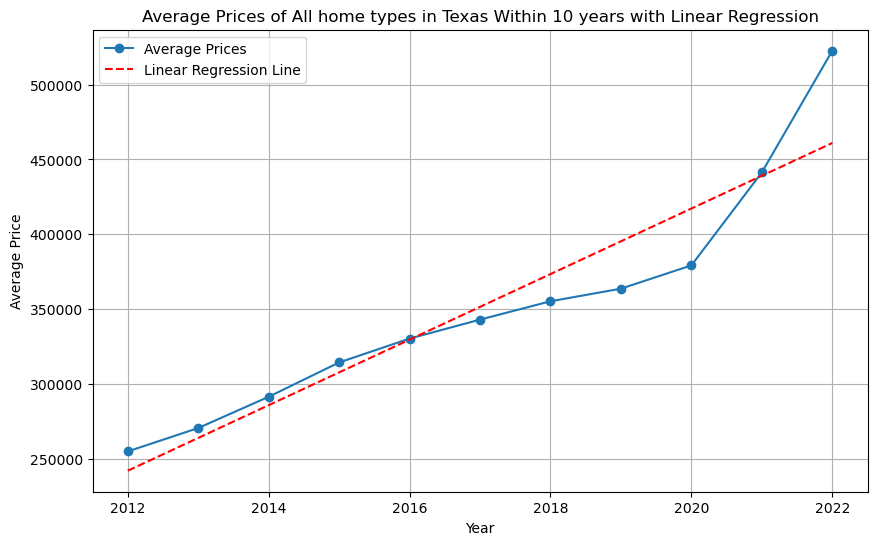

Slope: 21908.78
Intercept: -43838561.28
R-squared: 0.88
P-value: 0.00
Standard Error: 2648.81


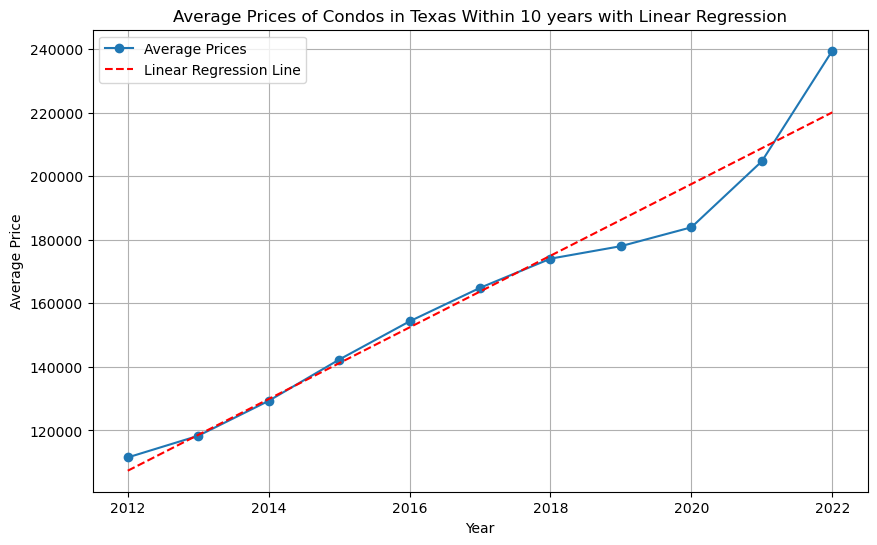

Slope: 11281.91
Intercept: -22591880.35
R-squared: 0.95
P-value: 0.00
Standard Error: 824.31


In [16]:
# Average Prices of All home types in Florida Within 10 years with Linear Regression
Tex_df = reduced_df[reduced_df['state'] == 'Texas']
Tex_1 = Tex_df[Tex_df['property type'] == 'All home types - top tier']
Tex_plot1 = Tex_1.groupby('year').mean(numeric_only=True)
mean_prices = Tex_1.groupby('year')['price'].mean()

# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Prices of All home types in Texas Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")

# Average Prices of Condos in Florida Within 10 years with Linear Regression
Tex_df = reduced_df[reduced_df['state'] == 'Texas']
Tex_1 = Tex_df[Tex_df['property type'] == 'condos']
Tex_plot1 = Tex_1.groupby('year').mean(numeric_only=True)
mean_prices = Tex_1.groupby('year')['price'].mean()
# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Prices of Condos in Texas Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")

In [49]:
# Using linear regression we can clearly see that over the course of ten years, real estate value has nearly tripled in the state of Florida.

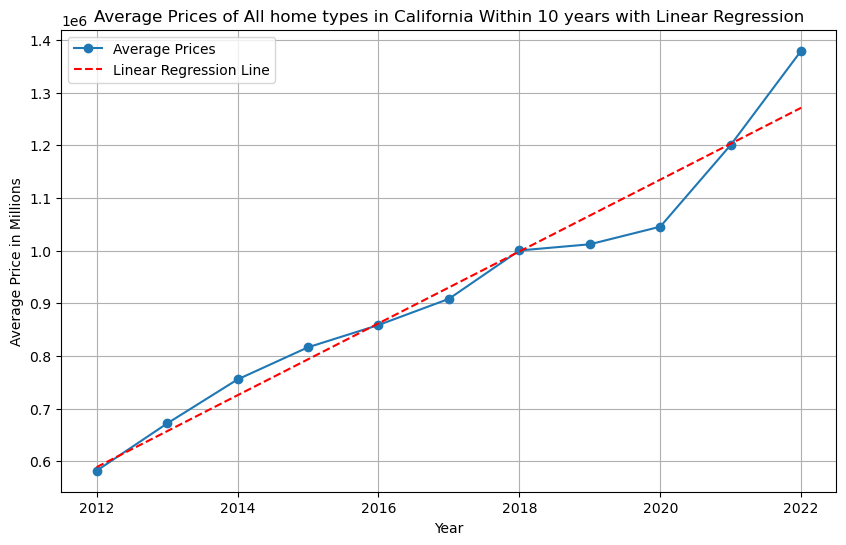

Slope: 68217.17
Intercept: -136663903.73
R-squared: 0.95
P-value: 0.00
Standard Error: 5009.36


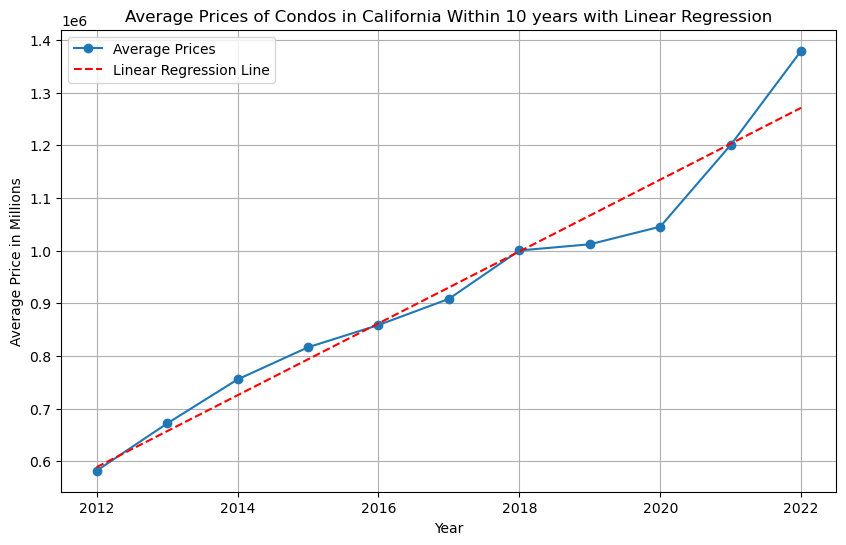

Slope: 68217.17
Intercept: -136663903.73
R-squared: 0.95
P-value: 0.00
Standard Error: 5009.36


In [24]:
# Average Prices of All home types in Atlanta Within 10 years with Linear Regression
Cal_df = reduced_df[reduced_df['state'] == 'California']
Cal_1 = Cal_df[Cal_df['property type'] == 'All home types - top tier']
Cal_plot1 = Cal_1.groupby('year').mean(numeric_only=True)
mean_prices = Cal_1.groupby('year')['price'].mean()

# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price in Millions')
plt.title('Average Prices of All home types in California Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")

# Average Prices of Condos in Florida Within 10 years with Linear Regression
Cal_df = reduced_df[reduced_df['state'] == 'California']
Cal_1 = Cal_df[Cal_df['property type'] == 'All home types - top tier']
Cal_plot1 = Cal_1.groupby('year').mean(numeric_only=True)
mean_prices = Cal_1.groupby('year')['price'].mean()

# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price in Millions')
plt.title('Average Prices of Condos in California Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")


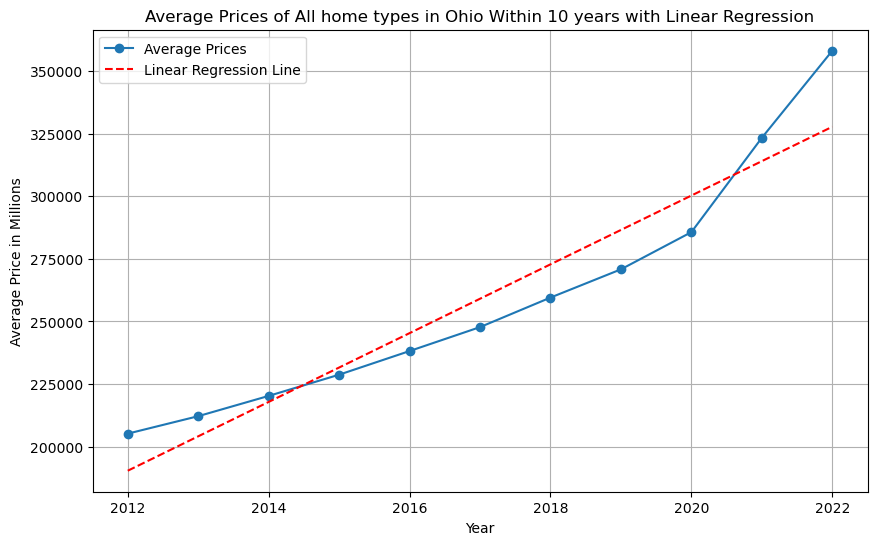

Slope: 13733.68
Intercept: -27441773.86
R-squared: 0.91
P-value: 0.00
Standard Error: 1464.22


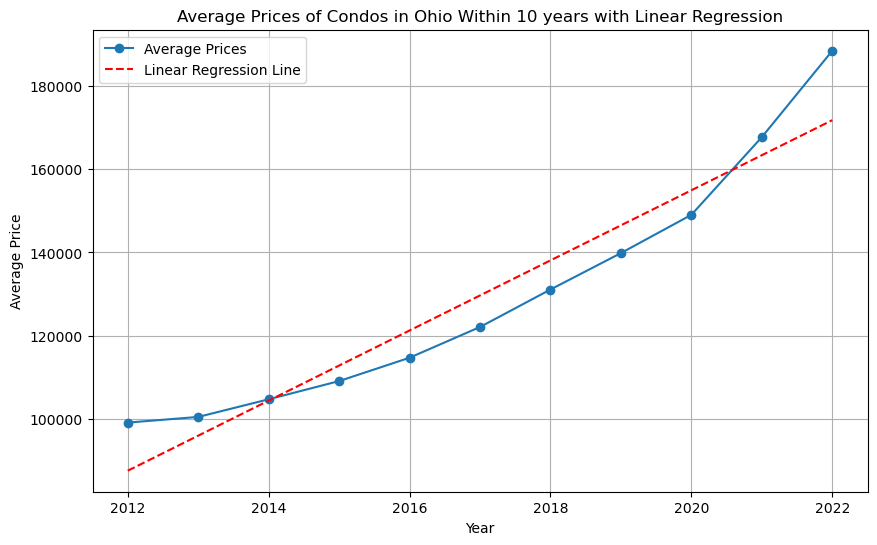

Slope: 8403.92
Intercept: -16821018.78
R-squared: 0.92
P-value: 0.00
Standard Error: 835.21


In [18]:
# Average Prices of All home types in  Washington Within 10 years with Linear Regression
Oh_df = reduced_df[reduced_df['state'] == 'Ohio']
Oh_1 = Oh_df[Oh_df['property type'] == 'All home types - top tier']
Oh_plot1 = Oh_1.groupby('year').mean(numeric_only=True)
mean_prices = Oh_1.groupby('year')['price'].mean()

# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Prices of All home types in Ohio Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")


Oh_df = reduced_df[reduced_df['state'] == 'Ohio']
Oh_1 = Oh_df[Oh_df['property type'] == 'condos']
Oh_plot1 = Oh_1.groupby('year').mean(numeric_only=True)
mean_prices = Oh_1.groupby('year')['price'].mean()

# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Prices of Condos in Ohio Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")


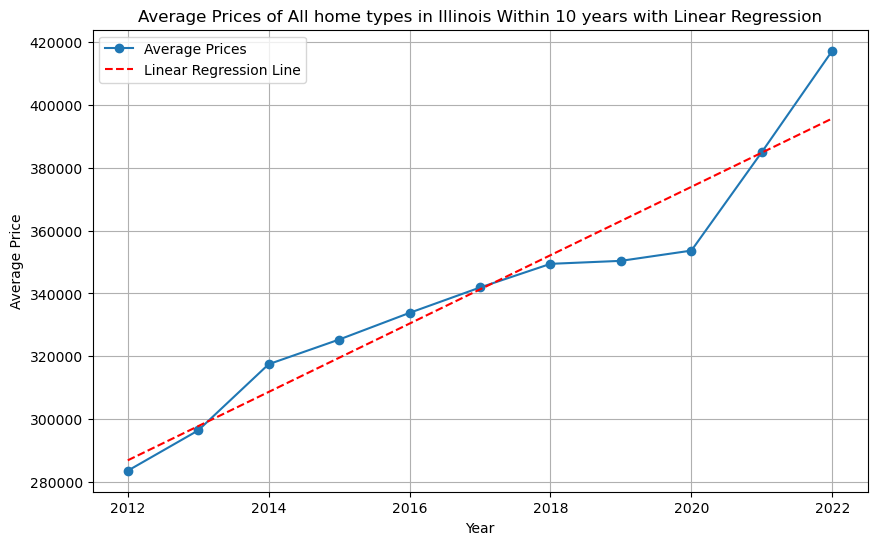

Slope: 10892.22
Intercept: -21628310.46
R-squared: 0.92
P-value: 0.00
Standard Error: 1093.39


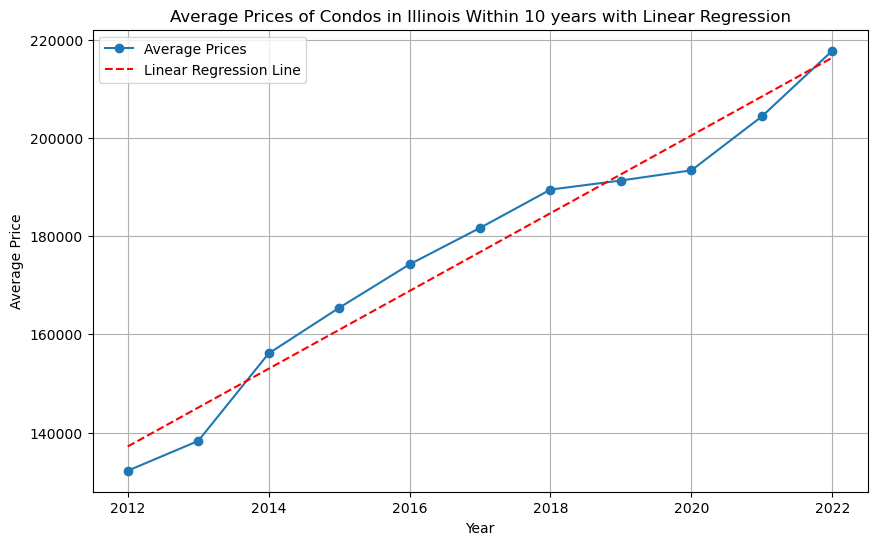

Slope: 7913.21
Intercept: -15784192.96
R-squared: 0.97
P-value: 0.00
Standard Error: 499.74


In [19]:
# Average Prices of All home types in New York Within 10 years with Linear Regression
Ill_df = reduced_df[reduced_df['state'] == 'Illinois']
Ill_1 = Ill_df[Ill_df['property type'] == 'All home types - top tier']
Ill_plot1 = Ill_1.groupby('year').mean(numeric_only=True)
mean_prices = Ill_1.groupby('year')['price'].mean()

# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Prices of All home types in Illinois Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")


# Average Prices of Condos in New York Within 10 years with Linear Regression
Ill_df = reduced_df[reduced_df['state'] == 'Illinois']
Ill_1 = Ill_df[Ill_df['property type'] == 'condos']
Ill_plot1 = Ill_1.groupby('year').mean(numeric_only=True)
mean_prices = Ill_1.groupby('year')['price'].mean()


# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Prices of Condos in Illinois Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")
